Download the spacy library for the Text Analysis using Python

In [3]:
!pip install spacy

**Download Available trained pipelines for English**

In [4]:
# Small English Pipeline. [ Size – 11 MB ]

!python -m spacy download en_core_web_sm

# Medium English Pipeline [ Size – 91 MB ]
#!python -m spacy download en_core_web_md

# Large English Pipeline  [ Size – 789 MB ]
#!python -m spacy download en_core_web_lg

After downloading library, import for the further use.

In [101]:
import spacy

Create object or engine using Small English Pipeline

In [116]:
import warnings
warnings.filterwarnings("ignore")

In [102]:
text_engine = spacy.load("en_core_web_sm")

In [103]:
doc = text_engine("Apple is looking to buying U.K. startup for $1 billion.")

In [104]:
# Tokenization : Splitting Paragraphs/Sentences into words.
for token in doc:
    print(token.text)

Apple
is
looking
to
buying
U.K.
startup
for
$
1
billion
.


In [105]:
# Words details POS(Part of Speech), Dependency, Tag, Shape..etc
for token in doc:
    print("-----------")
    print(token.text)
    print("-----------")
    print(token.pos_)
    print(token.dep_)
    print(token.tag_)
    print(token.is_alpha)
    print(token.is_stop)
    print(token.shape_)
    print(token.lemma_)

-----------
Apple
-----------
PROPN
nsubj
NNP
True
False
Xxxxx
Apple
-----------
is
-----------
AUX
aux
VBZ
True
True
xx
be
-----------
looking
-----------
VERB
ROOT
VBG
True
False
xxxx
look
-----------
to
-----------
ADP
prep
IN
True
True
xx
to
-----------
buying
-----------
VERB
pcomp
VBG
True
False
xxxx
buy
-----------
U.K.
-----------
PROPN
dobj
NNP
False
False
X.X.
U.K.
-----------
startup
-----------
NOUN
dep
NN
True
False
xxxx
startup
-----------
for
-----------
ADP
prep
IN
True
True
xxx
for
-----------
$
-----------
SYM
quantmod
$
False
False
$
$
-----------
1
-----------
NUM
compound
CD
False
False
d
1
-----------
billion
-----------
NUM
pobj
CD
True
False
xxxx
billion
-----------
.
-----------
PUNCT
punct
.
False
False
.
.


In [106]:
# Lemmatization: process of getting root word.
# Example: going   --> go
#          reading --> read
#          working --> work

sample = text_engine("going to office")

In [107]:
for token in sample:
    print("--------------------------------------------------")
    print("Original Text         : ", token.text)
    print("Lemmatization         : ", token.lemma_)
    print("POS(Part of Speech)   : ", token.pos_)

--------------------------------------------------
Original Text         :  going
Lemmatization         :  go
POS(Part of Speech)   :  VERB
--------------------------------------------------
Original Text         :  to
Lemmatization         :  to
POS(Part of Speech)   :  ADP
--------------------------------------------------
Original Text         :  office
Lemmatization         :  office
POS(Part of Speech)   :  NOUN


In [108]:
# Named Entities
# Real world entities name like Country, City, Fruits, Animal, Product, books...etc

doc = text_engine("Apple is looking to buying U.K. startup for $1 billion")

for ent in doc.ents:
    print("--------------------------------------------------")
    print("Original Text      : ", ent.text)
    print("Entity Tag         : ", ent.label_)

# GPE: Geopolitical Entity
# ORG: Organization

--------------------------------------------------
Original Text      :  Apple
Entity Tag         :  ORG
--------------------------------------------------
Original Text      :  U.K.
Entity Tag         :  GPE
--------------------------------------------------
Original Text      :  $1 billion
Entity Tag         :  MONEY


In [109]:
# List English Stop words
# Stop words are common words used to form the sentenses

news = """
Apple is looking to buying U.K. startup for $1 billion.
"""

sample = text_engine(news)


In [110]:
# List Stop Words
for token in sample:
    if token.is_stop == True:
        print(token.text)

is
to
for


In [111]:
# Remove Stop Words
for token in sample:
    if token.is_stop == False:
        print(token.text)



Apple
looking
buying
U.K.
startup
$
1
billion
.




In [112]:
# Display Entity Name
for ent in sample.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [113]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

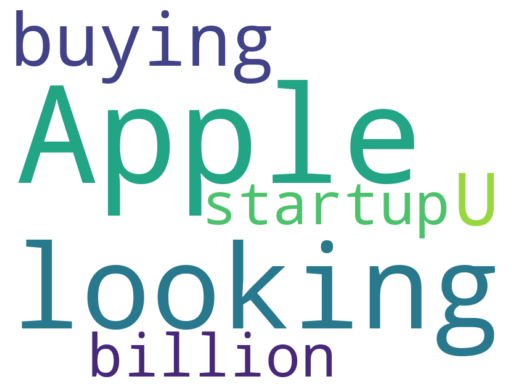

In [114]:
wordcloud = WordCloud(stopwords=STOPWORDS, max_words=100, background_color='white', width=800, height=600).generate(news)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [120]:
# Similarity between two sentence & words with respect to context.
sent1 = text_engine("I'm going to College.")
sent2 = text_engine("I'm going to School.")

sent1.similarity(sent2)

0.9664888651449254

In [122]:

sent1 = text_engine("I'm going to College.")
sent2 = text_engine("Students played well.")

sent1.similarity(sent2)

0.3508002880727384